#                                                      1. Introduction

**Topic:** Medical Cost (Prediction)


**Link:** https://www.kaggle.com/mirichoi0218/insurance

**Goal of a project:** Analyze of impact of columns to charges of medical treatment and try apply simple Linear regression to chosen dataset and visualize it.

**Why I choose this dataset?** I'm interested on medical sphere since 2019 years and search datasets according my prefer thing. So I find in kaggle this good datasets with several column value and over 1000+ row data.

**Done by:** Zhanibek Balabaev BD-2005

# 2. Data description

Row number: 1338

Column number: 7 

dtypes: float64(2), int64(2), object(3)

memory usage: 73.3+ KB

There are four numerical variables:
- Age
- BMI
- children
- Charges 

There are three categorical variables:
- Sex
- Smoker
- Region

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3. Research question

1) Relation between region(type) and charges

2) Which kind of people has higher charges value?

3) Does children column affect to charges value or not?

4) Does ages affect on charges value and how it increase or decrease according age value?

5) If exist difference between gender and charges?

6) If BMI level is higher, can we think that medical cost also will be high?

# 4. Data preparation

In [2]:
shape_df = df.shape
print("Dataframe shape is:", shape_df)

Dataframe shape is: (1338, 7)


In [3]:
#checking missing value from columns
#dropna if some column has missing value 
df.isnull().sum()
#df.dropna() dropna if some column has missing value - data cleaning 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#View through describe() min, max value for numeric datatype
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#View through describe() min, max value for string datatype
df.describe(include=[object])  

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
#unique value of region column
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
gender = {'male':0, 'female':1}
# replace sex column with 0/1
df['sex'] = df['sex'].apply(lambda x: gender[x])
# print head to verify
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [8]:
#update our dataframe with condition add new column to existing dataframe with loc
df.loc[(df.age >= 18) & (df.age < 40), 'age_group'] = 'Young Adults' 
df.loc[(df.age >= 40) & (df.age < 60), 'age_group'] = 'Middle Adults' 
df.loc[(df.age >= 60) & (df.age < 100), 'age_group'] = 'Old Adults'
df.drop('age', axis=1, inplace=True)
df.head(8)

,sex,bmi,children,smoker,region,charges,age_group
0,1,27.900,0,yes,southwest,16884.92400,Young Adults
1,0,33.770,1,no,southeast,1725.55230,Young Adults
2,0,33.000,3,no,southeast,4449.46200,Young Adults
3,0,22.705,0,no,northwest,21984.47061,Young Adults
4,0,28.880,0,no,northwest,3866.85520,Young Adults
5,1,25.740,0,no,southeast,3756.62160,Young Adults
6,1,33.440,1,no,southeast,8240.58960,Middle Adults
7,1,27.740,3,no,northwest,7281.50560,Young Adults


In [9]:
#Result of after data preparation
df.head()

,sex,bmi,children,smoker,region,charges,age_group
0,1,27.900,0,yes,southwest,16884.92400,Young Adults
1,0,33.770,1,no,southeast,1725.55230,Young Adults
2,0,33.000,3,no,southeast,4449.46200,Young Adults
3,0,22.705,0,no,northwest,21984.47061,Young Adults
4,0,28.880,0,no,northwest,3866.85520,Young Adults


# 5. Data analysis and visualisation

### 5.1 Q1: Relation between region(type) and charges

We look into value counts of region column, then plot information using searborn to see differences. Our goal is look relation between them and conclude our findings.

In [10]:
region = df['region'].value_counts()
region.to_frame() #output in dataframe form to_frame()

,region
southeast,364
southwest,325
northwest,325
northeast,324


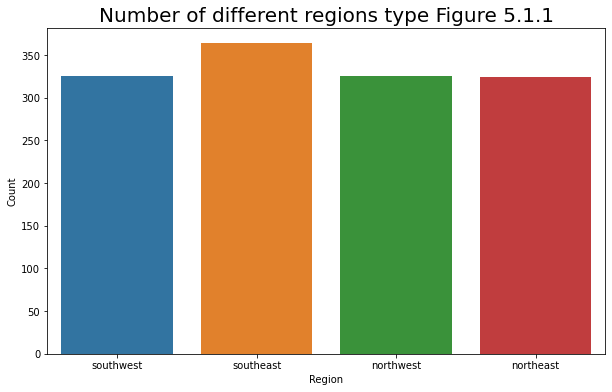

In [11]:
plt.figure(figsize=(10,6)) #size of our plot
sns.countplot(x='region', data=df) #Show the counts of observations in each categorical bin using bars 
plt.title('Number of different regions type Figure 5.1.1', size='20') #title of bar
plt.ylabel('Count') #label name for x, y 
plt.xlabel('Region')
plt.show() #show result

C:\Users\zhani\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 1.0, 'Relation between region and charges Figure 5.1.2')

<Figure size 720x432 with 0 Axes>

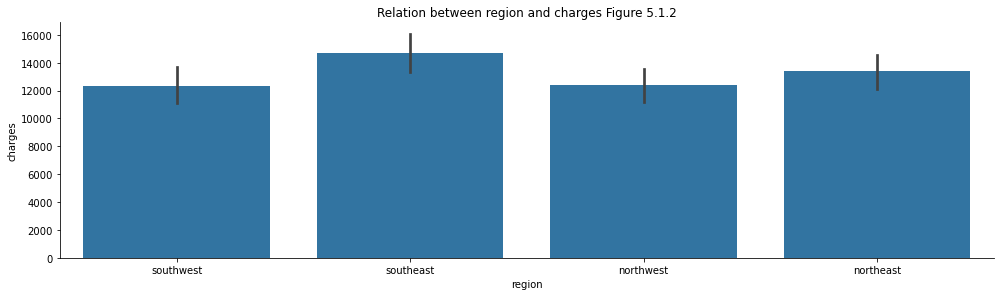

In [12]:
plt.figure(figsize=(10,6)) #figure size 
g = sns.FacetGrid(df,  height=4, aspect=3.5)
g.map(sns.barplot, "region", "charges")
plt.title('Relation between region and charges Figure 5.1.2')

Documentation for [**`countplot`**](https://seaborn.pydata.org/generated/seaborn.countplot.html)

### Finding of Q2

Almost each region seems to have an equal volume of people. And also charges volume also the properly same. 

### 5.2 Q2: Which kind of people has higher charges value?

Create 2 Dataframe for non-smoker and smoker and compare by histogram value and plotting.

In addition, consider gender of smoker and non-smoker.

In [13]:
smokers_df = df[df['smoker'] == "yes"]

non_smokers_df = df[df['smoker'] == "no"]

print('Smokers:', smokers_df.shape[0], "Non-smokers:", non_smokers_df.shape[0], sep='\n')

Smokers:
274
Non-smokers:
1064


Text(0.5, 1.0, 'Distribution of charges for non-smokers Figure 5.2.2')

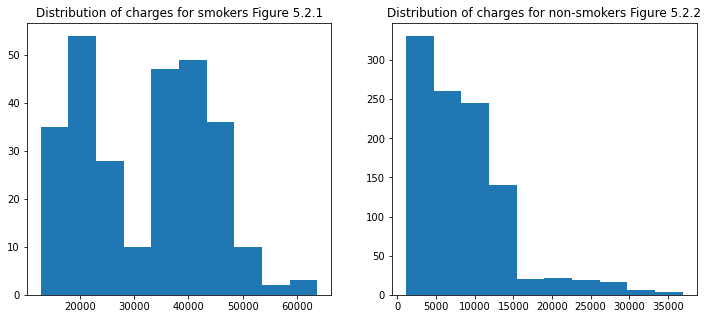

In [14]:
# create the figure
fig = plt.figure(figsize=(12,5))

# add first sub plot for smokers
ax = fig.add_subplot(121)
# draw distribution of charges for smokers
ax.hist(smokers_df["charges"])
# set sub plot title
ax.set_title('Distribution of charges for smokers Figure 5.2.1')

# add second sub plot for non smokers
ax = fig.add_subplot(122)
# draw distribution of charges for non-smokers
ax.hist(non_smokers_df["charges"])
# set sub plot title
ax.set_title('Distribution of charges for non-smokers Figure 5.2.2')

### Now lets check smoker/non-smoker gender

Text(0.5, 1.0, 'Number of smokers and non-smokers Figure 5.2.3')

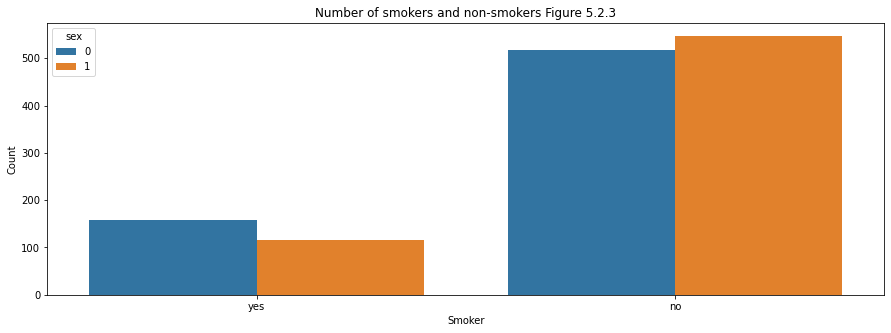

In [15]:
# create the figure
plt.figure(figsize=(15,5))
# draw barchart of count for smokers male and female with countplot()
sns.countplot(x='smoker', hue='sex', data=df)
#set label x 
plt.xlabel('Smoker')
#set label y 
plt.ylabel('Count')
#set title 
plt.title("Number of smokers and non-smokers Figure 5.2.3")

### Finding of Q2

- According histogram, smoker patients spend more than non-smoker patients on medical treatment. And Male gender smoke more than female. That's way gender don't affect on charges and type of people like smoker and non-smoker.

### 5.3 Q3: Does children column affect to charges value or not?

Column children contain value of each patients value. It's affect on charges or not?

Look through value_counts our values. Then plot boxplot and make some findings from it.

In [16]:
df.children.value_counts().to_frame()

,children
0,574
1,324
2,240
3,157
4,25
5,18


As you can see, many patients hasn't got children. So now we need see affect to charges value.

Text(0.5, 0, 'Number of children')

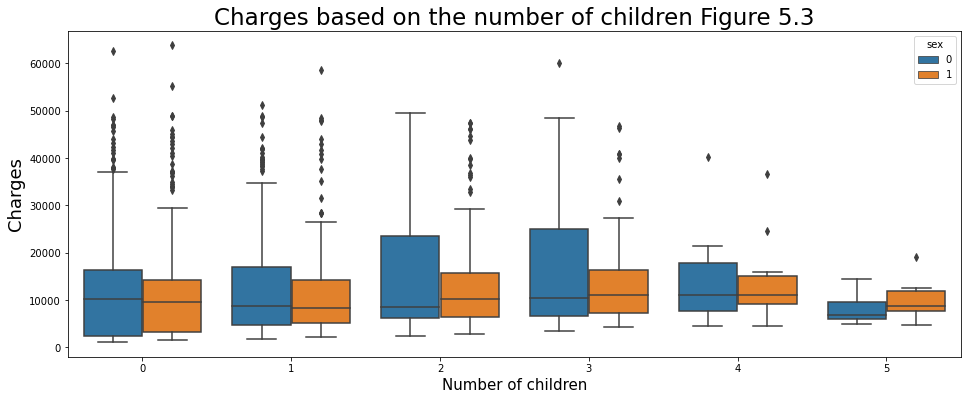

In [17]:
#create a figure
plt.figure(figsize=(16,6))
#plot boxplot of children and charges with legend of sex
sns.boxplot(x="children", y="charges",hue='sex',data=df)
#set a title 
plt.title('Charges based on the number of children Figure 5.3', size='23')
#set a label y
plt.ylabel('Charges',size=18)
#set a label x
plt.xlabel('Number of children',size=15)

### Finding of Q3

- Except for people with five children, practically all groups have the same range and mean of charges, as well as relatively comparable distributions. This might be due to the tiny sample size of this type of person.

## 5.4 Q4: Does ages affect on charges value and how it increase or decrease according age value?

Minimum value of age was 18 and maximum was 65. With group name of age category, consider with scatter plot on charges value and make findings from it.

In [18]:
grouped = df.age_group.value_counts()
grouped.to_frame()

,age_group
Young Adults,674
Middle Adults,550
Old Adults,114


Text(0.5, 1.0, 'Scatter plot of charges and age Figure 5.4')

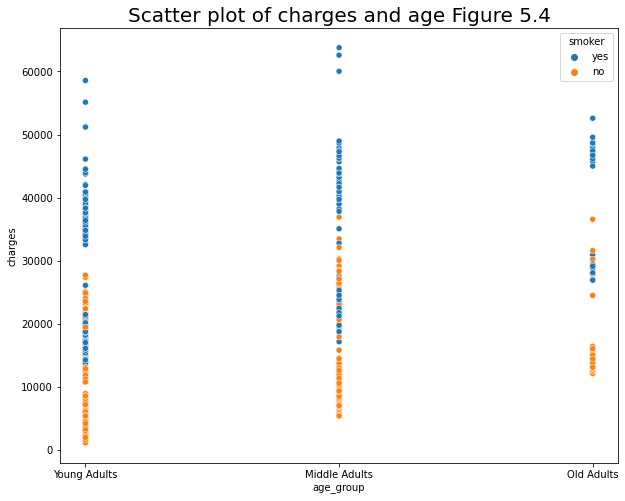

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age_group',y='charges',data=df,hue='smoker')
plt.title('Scatter plot of charges and age Figure 5.4', size='20')

### Finding of Q4

- As a person's age grows, so do the charges.

- Smokers and obesity persons, regardless of age, have the highest expenses.

## 5.5 Q5: If exist difference between gender and charges?

In section 5.2 we consider just count and plot barchart of smoker and non-smoker gender(male/female) and find that male smoke more than female. Now, we want watch proportion of male/female and plot distribution function look the dynamic flow.

In [20]:
df.sex.value_counts().to_frame()

,sex
0,676
1,662


Male is 676,Female is 662

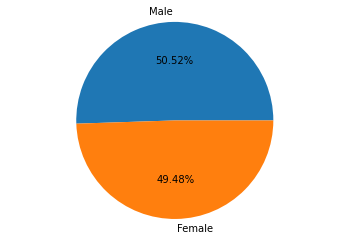

In [21]:
labels = 'Male', 'Female'
sizes = [676, 662]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Has the same proportion, so lets look affect on charges

'\nThe default ordering of the facets is derived from the information in the DataFrame. \nIf the variable used to define facets has a categorical type, then the order of the categories is used. \nOtherwise, the facets will be in the order of appearance of the category levels. It is possible, however, \nto specify an ordering of any facet dimension with the appropriate *_order parameter:\n'

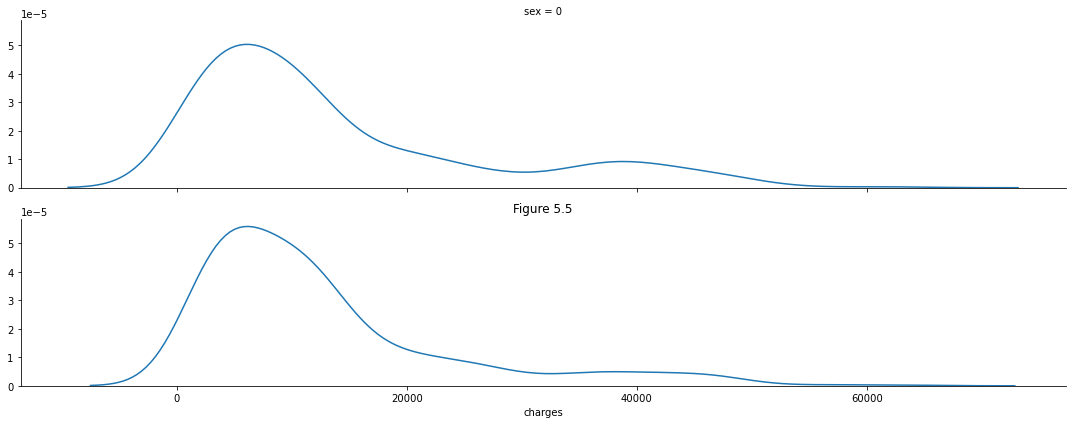

In [22]:
gender = df.sex.value_counts().index
g = sns.FacetGrid(df, row="sex", row_order=gender,
                  height=3, aspect=5)

g.map(sns.kdeplot, "charges")

plt.title('Figure 5.5')
'''
The default ordering of the facets is derived from the information in the DataFrame. 
If the variable used to define facets has a categorical type, then the order of the categories is used. 
Otherwise, the facets will be in the order of appearance of the category levels. It is possible, however, 
to specify an ordering of any facet dimension with the appropriate *_order parameter:
'''


Documentation for [**`sns.FacetGrid`**](https://seaborn.pydata.org/tutorial/axis_grids.html)

### Finding Q5

- As can be seen, the two distributions are nearly identical for both women and men, indicating that the sex variable has so little impact on medical expenses.

## 5.6 Q6: If BMI level is higher, can we think that medical cost also will be high?
https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html - bmi status 

In this section we consider bmi values and look to influence on charges. 

Also we divide our bmi values to 4 group and look which group pay more charges:
- Underweight 

- Healthy 

- Overweight 

- Obesity

Lets look values of bmi from Dataframe

In [23]:
df["bmi"].value_counts().to_frame()

,bmi
32.300,13
28.310,9
30.800,8
34.100,8
28.880,8
...,...
44.745,1
26.070,1
27.300,1
37.715,1


In [24]:
# create new dataframe to add new column 'bmi_status' and visualize after jointplot of bmi and charges column
df1 = df 
df1.loc[(df1.bmi < 18.5) , 'bmi_status'] = 'Underweight'
df1.loc[(df1.bmi >= 18.5) & (df1.bmi < 25), 'bmi_status'] = 'Healthy' 
df1.loc[(df1.bmi >= 25) & (df1.bmi < 30), 'bmi_status'] = 'Overweight' 
df1.loc[(df1.bmi >= 30) , 'bmi_status'] = 'Obesity'
df1.head() # new dataframe with new column

,sex,bmi,children,smoker,region,charges,age_group,bmi_status
0,1,27.900,0,yes,southwest,16884.92400,Young Adults,Overweight
1,0,33.770,1,no,southeast,1725.55230,Young Adults,Obesity
2,0,33.000,3,no,southeast,4449.46200,Young Adults,Obesity
3,0,22.705,0,no,northwest,21984.47061,Young Adults,Healthy
4,0,28.880,0,no,northwest,3866.85520,Young Adults,Overweight


Text(0.5, 1.0, '   Plot Figure 5.6.1')

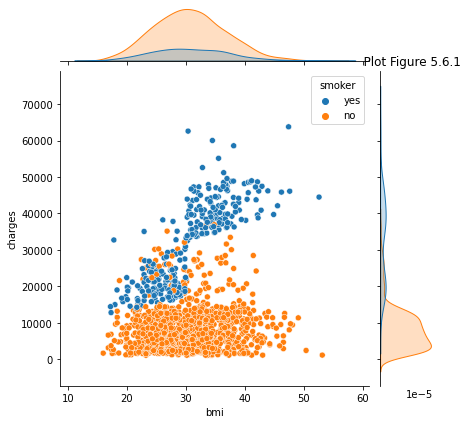

In [25]:
sns.jointplot(x="bmi",y="charges",data=df, hue='smoker')
plt.title('   Plot Figure 5.6.1')
#Draw a plot of two variables with bivariate and univariate graphs

Here we see that if bmi value higher than thirty which smokes pay more than other bmi status.And among smoker and non-smoker group, smokers group people pay more for medical treatment.

BMI > 30 is 'Obesity' status.

Text(0.5, 1.0, 'Figure 5.6.2')

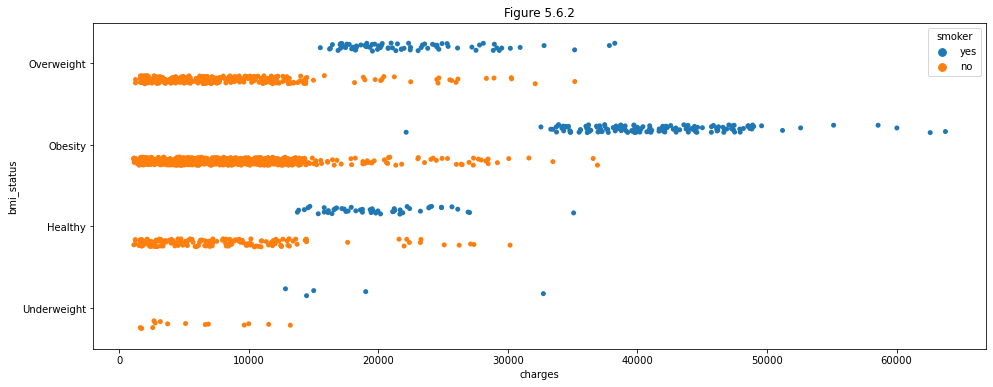

In [26]:

plt.figure(figsize=(16,6))
sns.stripplot(x="charges",y="bmi_status",data=df1, hue='smoker',dodge=True)
plt.title('Figure 5.6.2')

Here we see clearly that obesity status pay more than other as I mention in Figure 5.6.1.

### Findings of Q6
- Obesity status people make up a large portion of smokers.

- Even if a person is doesn't have obesity status, but smokes, his or her expenses are likely to be greater.

# Conclusion

We discovered that there are no massive differences in charges among groups location or gender. The costs are based on age, BMI, the number of children, and smoking.

Main feature from findings:

1)The charges are affected by the person's age; as a person becomes older, the health expenditures increase.

2)If you smoke, you may expect to pay far more for medical care than non-smokers. It will result in very serious health care expenses, especially for persons with high BMI status (>30).

3)This will have no effect on your medical insurance payments, regardless of where you reside.

4)The number of children has little impact on the medical expenditures that health insurance companies charge.

5)Your health-care costs will remain the same whether you are a male or a female.

#  Data Modelling

In [27]:
import sklearn
from sklearn.linear_model import LinearRegression
x=df[['bmi']] # take values of bmi
y=df[['charges']] # take values of charges
# Initialise and fit model
lr = LinearRegression()
lr = lr.fit(x, y) #we will use the fit method to “fit” the model to our dataset.

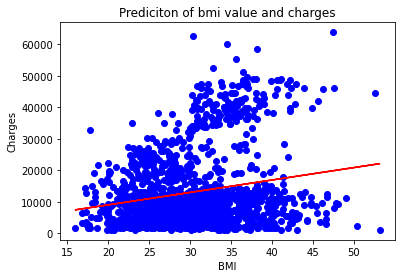

In [28]:
plt.scatter(x, y, color = "blue")
plt.plot(x, lr.predict(x), color = "red") # x - value is bmi
plt.title("Prediciton of bmi value and charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

Reference for [**`linear regression`**](https://medium.com/geekculture/linear-regression-using-python-7ce93ba8ff2a)

 | Project part | Mark     | Comment   
|:-------:|:--------:|:----------------------
| Introduction       |   /5    |     To get full point, you need to give brief background of your project and why it is interesting for you. 
| Data description       |   /5    | To get full point, you provide description of your dataset, namely columns.
| Research questions       |   /5    | To get full point, you need to create at least 5 good, different, interesting questions. 
| Data prepartion       |   /20    | To get full point, you need to show proficient skill in using pandas in the purpose of data preparation. 
| Data analysis and visualisation       |   /30    | To get full point, you need to show proficient skill in using matplotlib or seaborn (or other libraries along with some pandas in the purpose of data visualisation and analysis. Also, you should commment all your graphs.
| Conclusion       |   /5    | To get full point, you need to write summary of your finding in general.
| Structure and code       |   /10    | To get full point, you need to write efficient code, and all the libraries should be properly used. Also, the whole project should be well structured. 
| Defense      |   /20    | To get full point, students should properly present their projects during the defense and be able to answer questions from instructor.
| Data modelling       |   /5 (bonus)    | 
|**Total**|**/100**  | 
